In [1]:
%pip install pandas numpy seaborn matplotlib scipy

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

df = pd.read_csv("../data/togo-dapaong_qc.csv", parse_dates=["Timestamp"])


Note: you may need to restart the kernel to use updated packages.


In [2]:
df.describe()
df.isna().sum()

# List columns with >5% missing
missing_report = df.isna().mean() * 100
missing_report[missing_report > 5]


Comments    100.0
dtype: float64

In [3]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df['outlier_flag'] = 0

for col in columns_to_check:
    df[f"{col}_zscore"] = zscore(df[col].fillna(df[col].median()))
    df['outlier_flag'] |= df[f"{col}_zscore"].abs() > 3

# Drop or Impute
df_clean = df.copy()
for col in columns_to_check:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())


In [4]:
df_clean.to_csv("../data/togo_clean.csv", index=False)


<Axes: xlabel='Timestamp'>

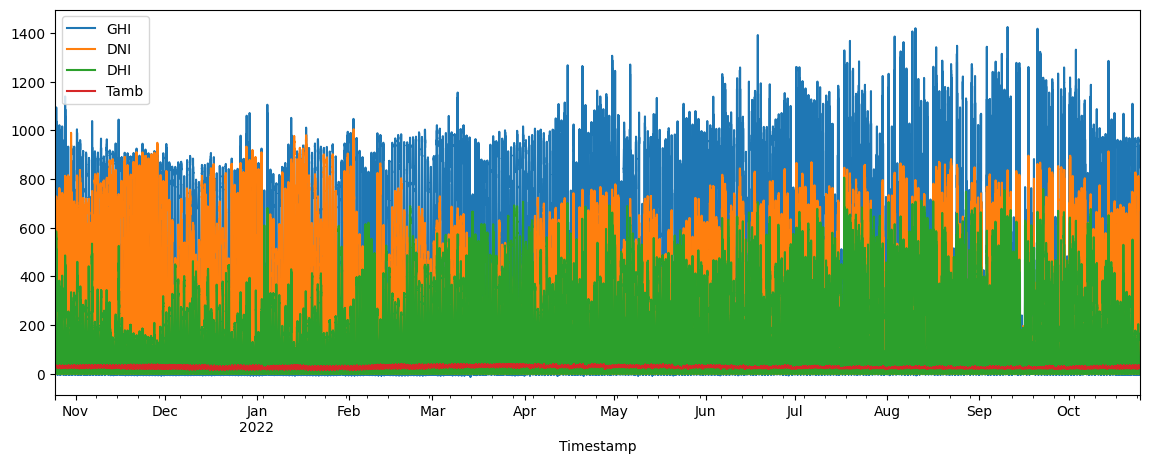

In [5]:
df_clean.set_index("Timestamp")[["GHI", "DNI", "DHI", "Tamb"]].plot(figsize=(14, 5))


<Axes: xlabel='Month'>

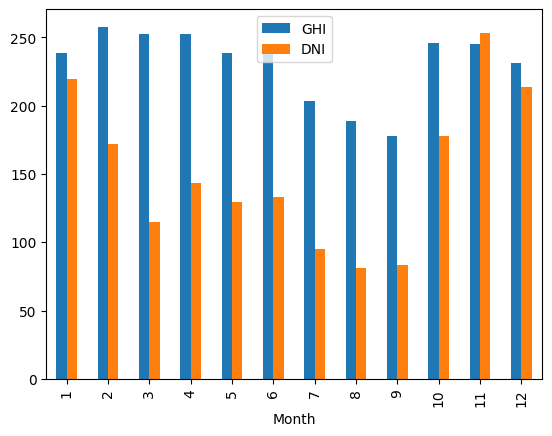

In [6]:
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Hour'] = df_clean['Timestamp'].dt.hour

df_clean.groupby('Month')[["GHI", "DNI"]].mean().plot(kind="bar")


<Axes: xlabel='Cleaning'>

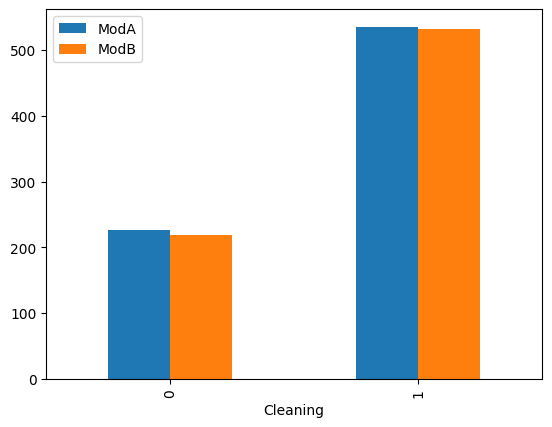

In [7]:
df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean().plot(kind="bar")


<Axes: xlabel='WS', ylabel='GHI'>

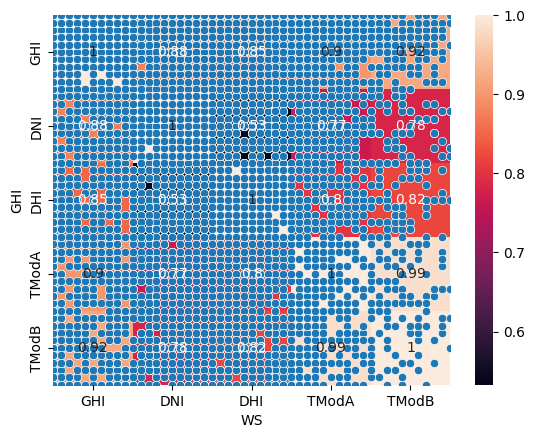

In [8]:
sns.heatmap(df_clean[["GHI", "DNI", "DHI", "TModA", "TModB"]].corr(), annot=True)

sns.scatterplot(data=df_clean, x='WS', y='GHI')
sns.scatterplot(data=df_clean, x='RH', y='Tamb')


<Axes: ylabel='Frequency'>

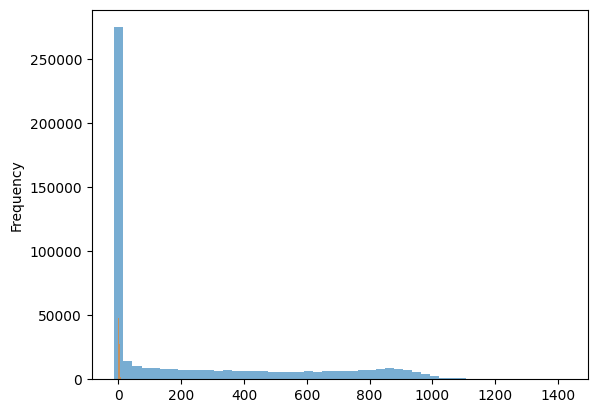

In [9]:
# Histogram
df_clean['GHI'].plot(kind='hist', bins=50, alpha=0.6)
df_clean['WS'].plot(kind='hist', bins=50, alpha=0.6)

# Wind Rose requires windrose or polar plot (optional)


<Axes: xlabel='RH', ylabel='Tamb'>

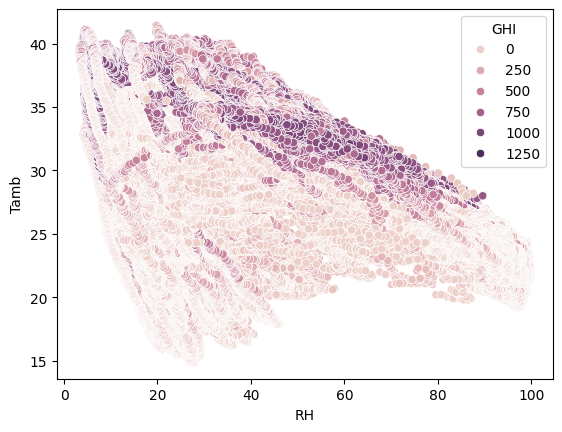

In [10]:
sns.scatterplot(data=df_clean, x='RH', y='Tamb', hue='GHI')


<Axes: xlabel='GHI', ylabel='Tamb'>

c:\Users\rebika\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\rebika\solar-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


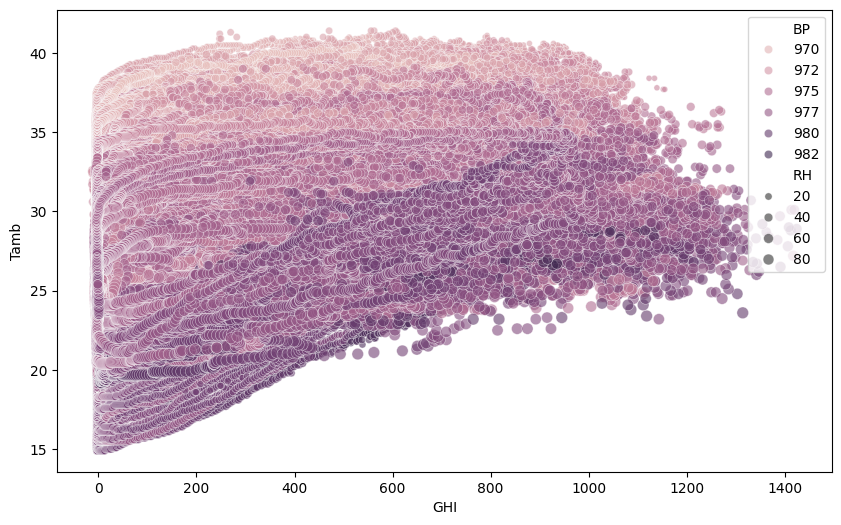

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clean, x='GHI', y='Tamb', size='RH', hue='BP', alpha=0.6)
